### Import

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime
import sys

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

In [ ]:
from google.colab import drive
from importlib import reload

drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


### utils module import

In [ ]:
if 'gdrive.MyDrive.utils' not in sys.modules:
  import  gdrive.MyDrive.utils as utils
else:
  print("utils reload")
  reload(utils)

if 'gdrive.MyDrive.data_EDA' not in sys.modules:
  import gdrive.MyDrive.data_EDA as EDA
else:
  print('eda module reload')
  reload(EDA)

utils reload
version 1
eda module reload


In [ ]:
project_name = '조회수예측'

### util 설정

In [ ]:
utils.seed_everything(311)
utils.set_dir(project_name)

현재 폴더 :  /content/gdrive/MyDrive/data/조회수예측
데이터 위치 :  /content/gdrive/MyDrive/data/조회수예측/sample_data


### Load Data

In [ ]:
train, test = utils.get_data()
train.head(5)


load from train :  /content/gdrive/MyDrive/data/조회수예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/조회수예측/sample_data/test.csv


,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## Index
### 1. EDA
#### 1-1 EDA1. 데이터 요약
#### 1-2 EDA2. 결측치 확인
#### 1-3 EDA3. 타겟 분포 확인
#### 1-4 EDA4. 상관계수 확인

### EDA1. 데이터 요약

In [ ]:
EDA.eda_info(train)
EDA.eda_na(train)
# display(train.isna().sum())
# display(test.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

None

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

1    205796
2     46493
dtype: int64

<Axes: xlabel='new', ylabel='Count'>

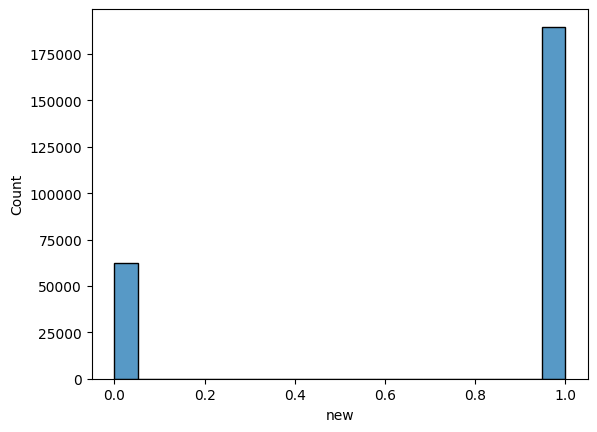

In [ ]:
sns.histplot(x = train['new'])

<Axes: xlabel='new', ylabel='Count'>

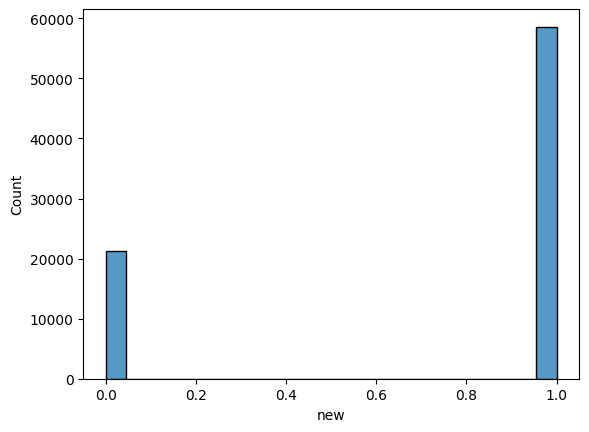

In [ ]:
sns.histplot(x = test['new'])

<Axes: xlabel='quality', ylabel='Count'>

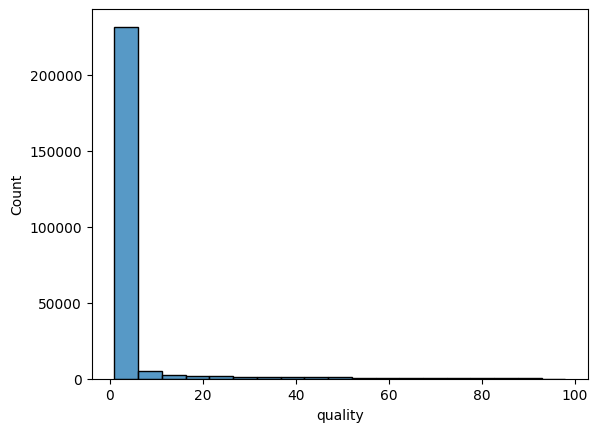

In [ ]:
sns.histplot(x = train['quality'])

<Axes: xlabel='quality', ylabel='Count'>

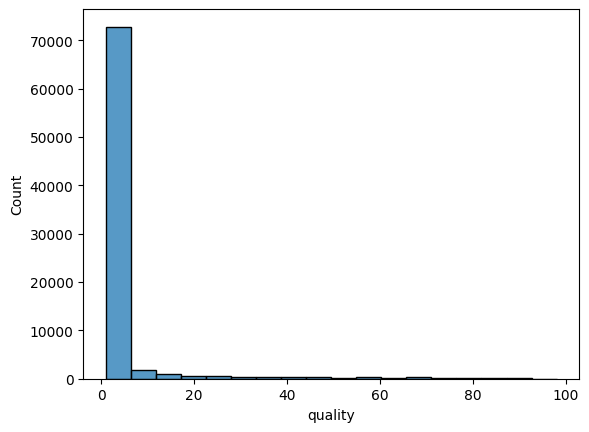

In [ ]:
sns.histplot(x=test['quality'])

<Axes: xlabel='duration', ylabel='Density'>

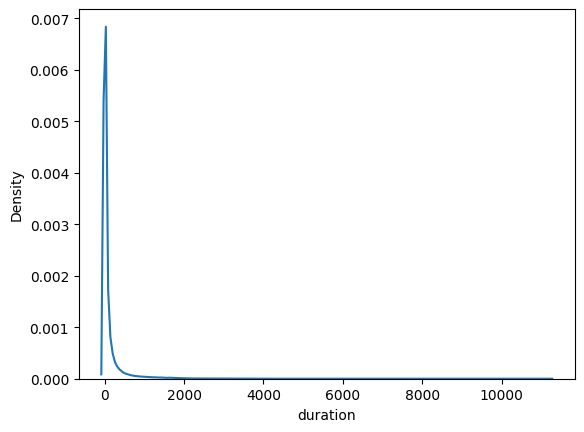

In [ ]:
sns.kdeplot(train['duration'])

<Axes: xlabel='duration', ylabel='Density'>

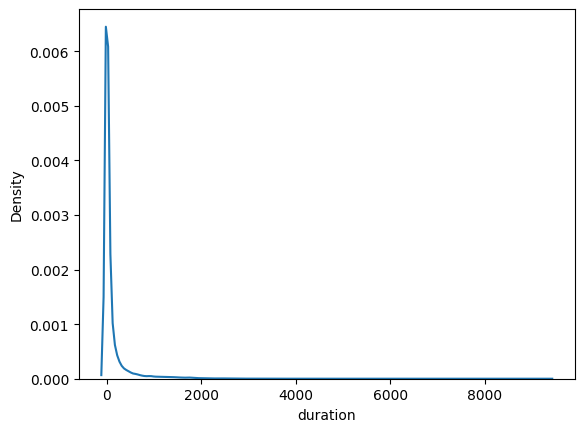

In [ ]:
sns.kdeplot(test['duration'])

<Axes: xlabel='transaction', ylabel='Count'>

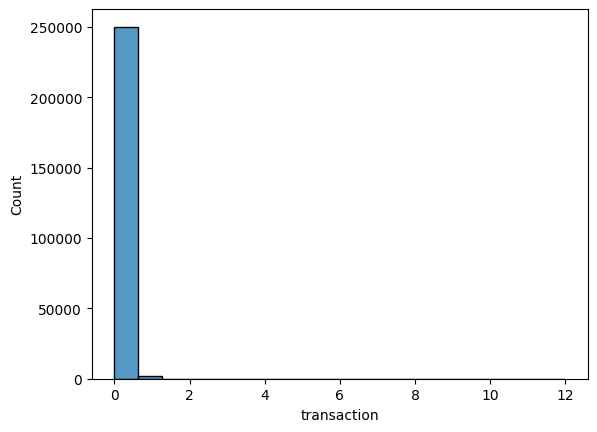

In [ ]:
sns.histplot(train['transaction'])

<Axes: xlabel='transaction', ylabel='Count'>

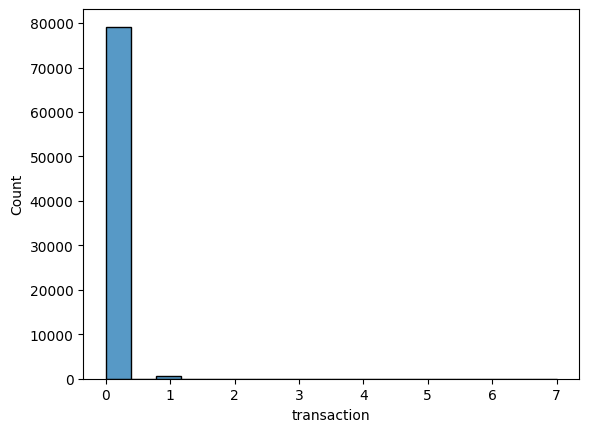

In [ ]:
sns.histplot(test['transaction'])

<Axes: xlabel='transaction_revenue', ylabel='Count'>

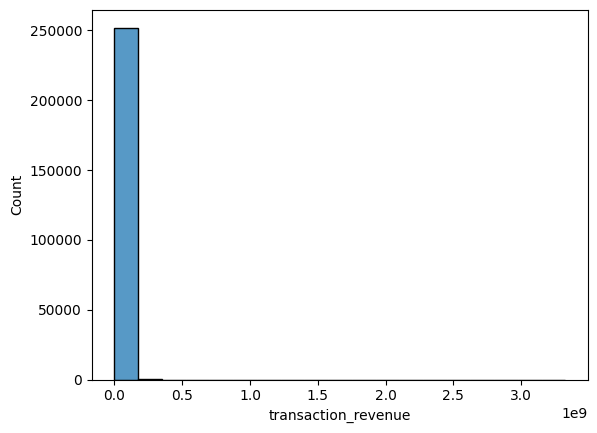

In [ ]:
sns.histplot(train['transaction_revenue'])

<Axes: xlabel='transaction_revenue', ylabel='Count'>

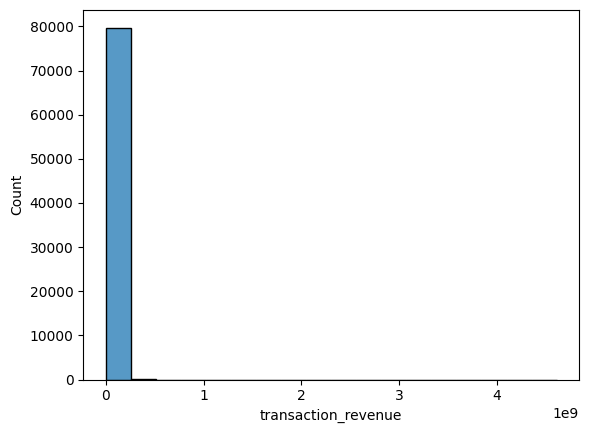

In [ ]:
sns.histplot(test['transaction_revenue'])

### 1-2 EDA2. 결측치 확인


In [ ]:
EDA.eda_na(train)
EDA.eda_na(test)

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

1    205796
2     46493
dtype: int64

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

1    62611
2    17175
dtype: int64

### 1-3 EDA3. 타겟 분포 확인


In [ ]:
EDA.eda_describe_all(train)
EDA.eda_describe_all(test)


count             252289
unique            252289
top       SESSION_000000
freq                   1
Name: sessionID, dtype: object

count          252289
unique         206024
top       USER_002675
freq               78
Name: userID, dtype: object

count    252289.000000
mean          3.592626
std           5.509465
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         386.000000
Name: TARGET, dtype: float64

count     252289
unique        70
top       Chrome
freq      174395
Name: browser, dtype: object

count      252289
unique         21
top       Windows
freq        88119
Name: OS, dtype: object

count      252289
unique          3
top       desktop
freq       167133
Name: device, dtype: object

count    252289.000000
mean          0.751955
std           0.431879
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: new, dtype: float64

count    252289.000000
mean          3.816805
std          11.091028
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          98.000000
Name: quality, dtype: float64

count    252289.000000
mean        113.104253
std         330.876019
min           0.000000
25%           0.000000
50%           3.000000
75%          71.000000
max       11186.000000
Name: duration, dtype: float64

count    252289.000000
mean          0.493672
std           0.499961
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: bounced, dtype: float64

count    252289.000000
mean          0.009033
std           0.100938
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: transaction, dtype: float64

count    2.522890e+05
mean     9.061248e+05
std      2.127689e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.325712e+09
Name: transaction_revenue, dtype: float64

count       252289
unique           6
top       Americas
freq        126506
Name: continent, dtype: object

count               252289
unique                  23
top       Northern America
freq                111945
Name: subcontinent, dtype: object

count            252289
unique              205
top       United States
freq             104201
Name: country, dtype: object

count     252289
unique       168
top       google
freq      116007
Name: traffic_source, dtype: object

count      252289
unique          7
top       organic
freq       107370
Name: traffic_medium, dtype: object

count        114614
unique          623
top       Category8
freq         103584
Name: keyword, dtype: object

count         91182
unique         1578
top       Category1
freq          18687
Name: referral_path, dtype: object

count              79786
unique             79786
top       SESSION_252289
freq                   1
Name: sessionID, dtype: object

count           79786
unique          64535
top       USER_108579
freq               58
Name: userID, dtype: object

count      79786
unique        45
top       Chrome
freq       57503
Name: browser, dtype: object

count       79786
unique         16
top       Windows
freq        28383
Name: OS, dtype: object

count       79786
unique          3
top       desktop
freq        54730
Name: device, dtype: object

count    79786.000000
mean         0.734515
std          0.441594
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: new, dtype: float64

count    79786.000000
mean         3.967576
std         11.349192
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         98.000000
Name: quality, dtype: float64

count    79786.000000
mean       121.550635
std        349.168791
min          0.000000
25%          0.000000
50%          2.000000
75%         75.000000
max       9316.000000
Name: duration, dtype: float64

count    79786.000000
mean         0.496804
std          0.499993
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: bounced, dtype: float64

count    79786.000000
mean         0.007909
std          0.095260
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: transaction, dtype: float64

count    7.978600e+04
mean     9.552892e+05
std      2.714007e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.609835e+09
Name: transaction_revenue, dtype: float64

count        79786
unique           6
top       Americas
freq         40429
Name: continent, dtype: object

count                79786
unique                  23
top       Northern America
freq                 35465
Name: subcontinent, dtype: object

count             79786
unique              192
top       United States
freq              33179
Name: country, dtype: object

count      79786
unique        97
top       google
freq       37210
Name: traffic_source, dtype: object

count       79786
unique          7
top       organic
freq        35894
Name: traffic_medium, dtype: object

count         36716
unique          211
top       Category8
freq          34598
Name: keyword, dtype: object

count         25895
unique          980
top       Category1
freq           6050
Name: referral_path, dtype: object

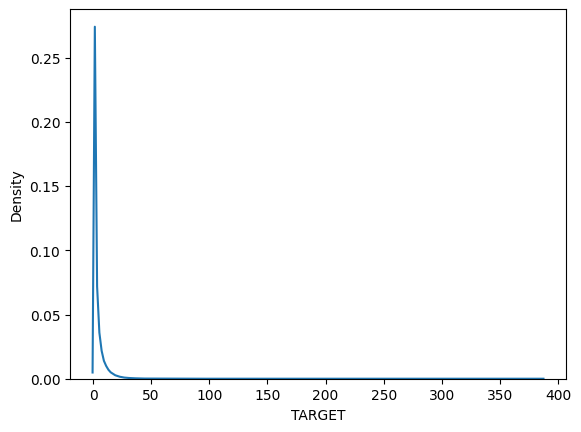

In [ ]:
EDA.eda_target_distribution(train)

#### 1-4 EDA4. 상관계수 확인


/content/gdrive/MyDrive/data_EDA.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = data.corr()


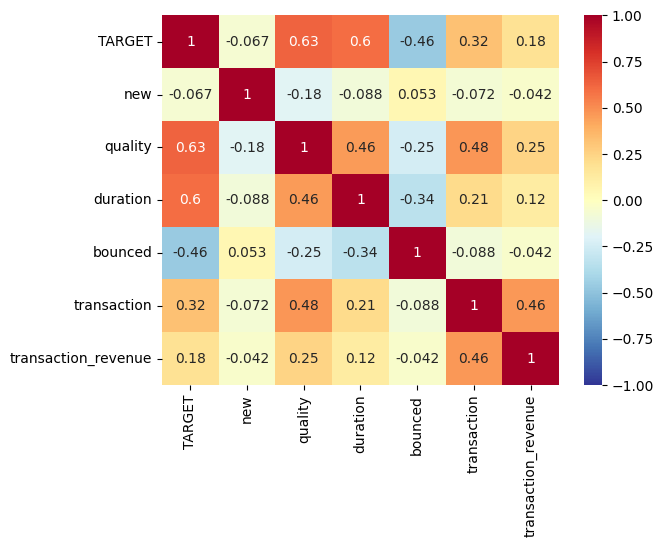

In [ ]:
EDA.eda_corr(train)

다만, target의 분포가 매우 편향되어 있으므로, oversampling을 통한 상관계수 분석이 필요하다.


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=311)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train.drop(columns=['TARGET']), train['TARGET'])

In [ ]:
train_x_oversampled['TARGET']=train_y_oversampled
train_x_oversampled.corr()

<ipython-input-196-beb02118688f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_x_oversampled.corr()


,new,quality,duration,bounced,transaction,transaction_revenue,TARGET
new,1.000000,-0.401098,-0.100540,0.021619,-0.221932,-0.160856,0.013349
quality,-0.401098,1.000000,0.077463,-0.109458,0.339681,0.314523,0.058422
duration,-0.100540,0.077463,1.000000,-0.086124,0.177654,0.138325,0.460220
bounced,0.021619,-0.109458,-0.086124,1.000000,-0.026999,-0.025990,-0.105960
transaction,-0.221932,0.339681,0.177654,-0.026999,1.000000,0.556688,0.177325
transaction_revenue,-0.160856,0.314523,0.138325,-0.025990,0.556688,1.000000,0.096333
TARGET,0.013349,0.058422,0.460220,-0.105960,0.177325,0.096333,1.000000


재분석 결과 duration과 상관계수가 클 수 있다고 생각했다.

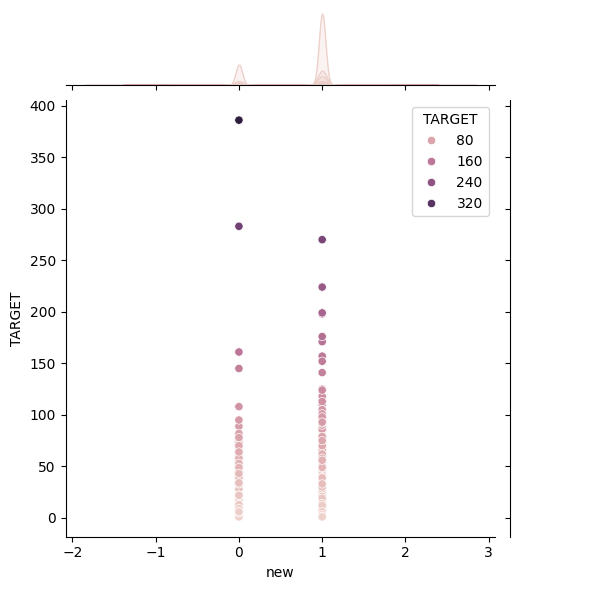

In [ ]:
sns.jointplot(train, hue='TARGET',x='new',y='TARGET')

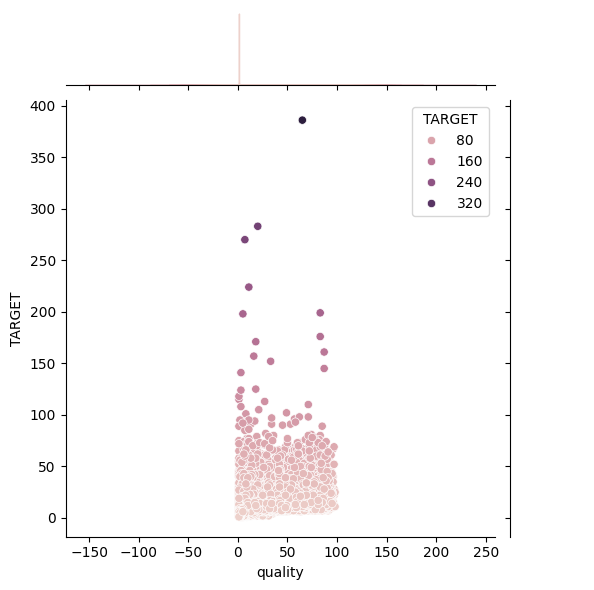

In [ ]:
sns.jointplot(train, hue='TARGET',x='quality',y='TARGET')

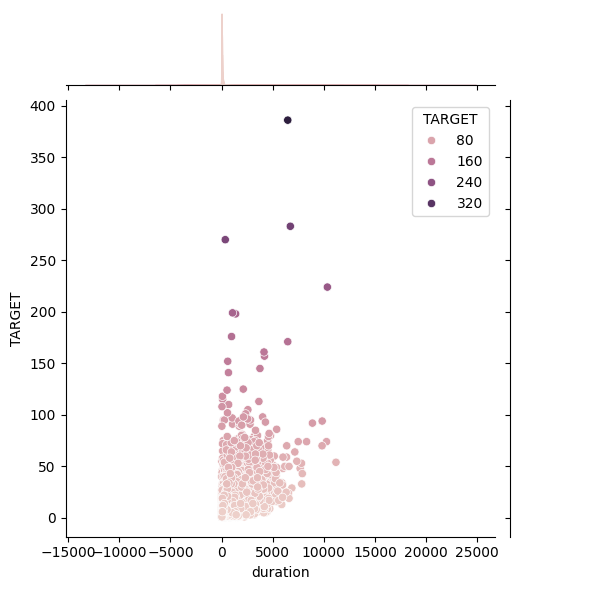

In [ ]:
sns.jointplot(train, hue='TARGET',x='duration',y='TARGET')

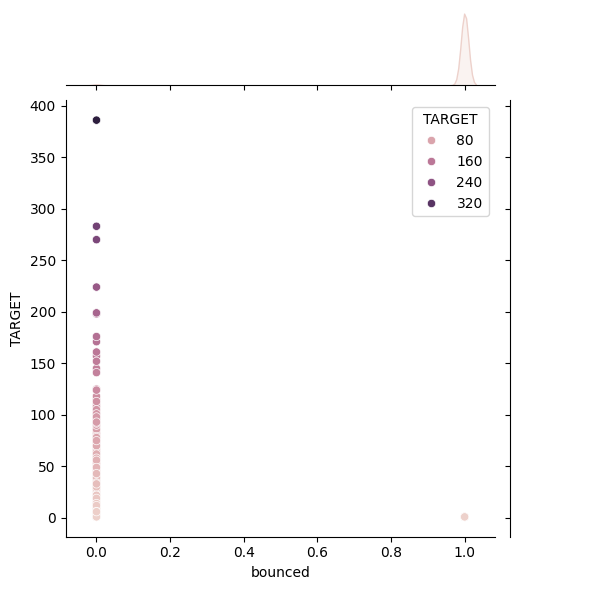

In [ ]:
sns.jointplot(train, hue='TARGET',x='bounced',y='TARGET')

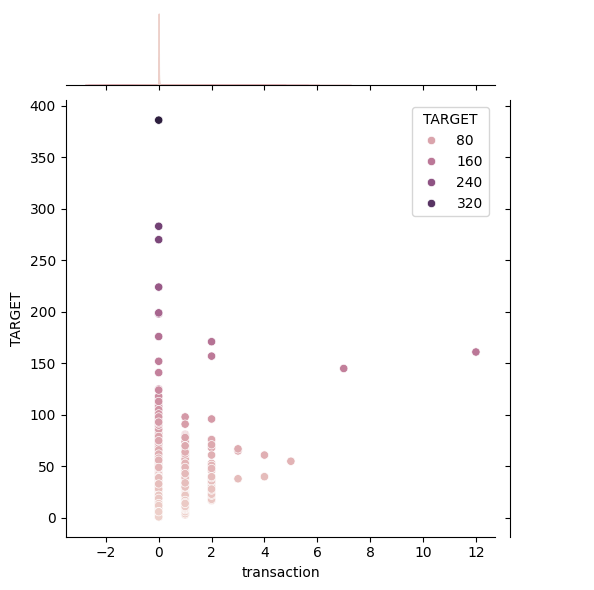

In [ ]:
sns.jointplot(train, hue='TARGET',x='transaction',y='TARGET')

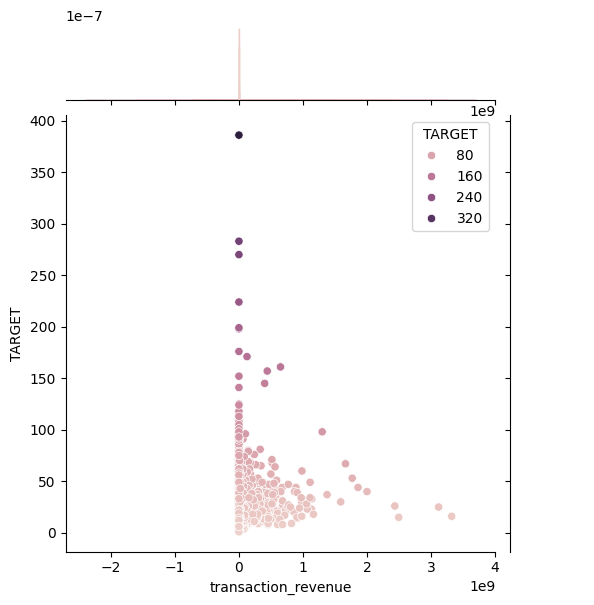

In [ ]:
sns.jointplot(train, hue='TARGET',x='transaction_revenue',y='TARGET')

## 2. 데이터 전처리

### 2-1 데이터 전처리1. 정규화
new : 정규화 x  
quality :  
duration :  
bounced :  
trainsaction :  
transcation_revenue :  
   

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmaxsc = MinMaxScaler()
stdsc = StandardScaler()


In [ ]:
train['new'].describe()


count    252289.000000
mean          0.751955
std           0.431879
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: new, dtype: float64

In [ ]:
train[['quality','duration','transaction','transaction_revenue']] = stdsc.fit_transform(train[['quality','duration','transaction','transaction_revenue']])

In [ ]:
train['quality'].describe()

count    2.522890e+05
mean     1.937672e-17
std      1.000002e+00
min     -2.539720e-01
25%     -2.539720e-01
50%     -2.539720e-01
75%     -2.539720e-01
max      8.491853e+00
Name: quality, dtype: float64

### 2-2 데이터 전처리2. 결측치 채우기
결측치는 전부 string타입이므로 ""로 채운다

In [ ]:
train.fillna("")
test.fillna("")

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,SESSION_332070,USER_268999,Internet Explorer,Windows,tablet,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,search.xfinity.com,referral,,Category1
79782,SESSION_332071,USER_269000,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,
79783,SESSION_332072,USER_269001,Safari,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,Australasia,Australia,google,organic,Category8,
79784,SESSION_332073,USER_269002,Safari,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,


### 2-3 데이터전처리3. ID 지우기


In [ ]:
train.drop(columns=['sessionID','userID'], inplace=True)
test.drop(columns=['sessionID','userID'],inplace = True)
train.head(5)

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


### 2-4 데이터전처리4. Category 변환


In [ ]:
categorical_features = list(train.dtypes[train.dtypes == "object"].index)

for i in categorical_features:
    count = train[i].nunique()
    print(f"{i}: {count}")
encoding_target = list(train.dtypes[train.dtypes == "object"].index)
for i in encoding_target:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    # test 데이터에 대해서 직접적으로 fit을 수행할 경우 Data Leakage
    for cases in np.unique(test[i]):
        if cases not in le.classes_:
            le.classes_ = np.append(le.classes_, cases)

    test[i] = le.transform(test[i])

### 2-5 데이터전처리5. 학습용 데이터 분리

In [ ]:
train_x = train.drop(columns=['TARGET'])
train_y = train['TARGET']

test_x = test